In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Simulation

In [159]:
n = 100
p_minus_1 = 90
np.random.seed(1)
X = np.random.normal( 0,2, [n, p_minus_1])
X = np.concatenate([np.ones([n,1]), X], axis = 1)
beta = np.random.normal(0, 5, p_minus_1 + 1)
sigma_g2 = np.var(X @ beta , ddof=1)
h2 = 1 # heritability
sigma_e2 = sigma_g2 * (1 - h2)/ h2

epsilon = np.random.normal(0, np.sqrt(sigma_e2), n)
y = X @ beta + epsilon

In [104]:
print('beta is {}, and sigma_g2 is {}, sigma_e2 is {}, h^2 is {}'.format(beta, sigma_g2,sigma_e2, h2))

beta is [  3.1701271    3.56500665  -2.41659598  -9.61075309  -3.80668622
   2.58873779   6.83181935   3.37062249  -3.01521147   4.8348767
   9.03435865  -8.93437277  -3.52501138  -2.09114362   1.58003366
   8.67161158  -2.14302264  -5.63945201  -3.1349975    1.19480784
   7.68776173   1.53781507   0.62989274   5.46833574   1.12922166
  -0.64448782   4.56872861   9.10033988   0.98304666  -1.44008789
  -5.87470095   7.02678073  -2.86481238  10.59363357   0.60161031
   6.37383935  -0.30376793   4.81641488   5.40863269   0.83975283
  -5.40858776  -4.13108565   5.90564579   9.94084962  -0.70174848
   8.8952332  -10.21300268  -2.08651778  -2.52222117  -0.49867183
  -0.81185405  -0.30212355  -0.09892479   4.15831464   3.79755958
  -4.01809466 -12.26048255  -3.43585967   0.15702209   1.42705458
   0.51248759  -0.82400744  -6.68211261   7.63235475  -2.21301747
  -4.58927136   0.5833807    0.23649408   3.05533794  -1.94527762
   2.83990104  -1.25208333  -3.93042763   9.94843281  -6.70235786
  -

In [4]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y.reshape([-1,1]), test_size = 0.2, random_state = 123)

In [2]:
from numpy.linalg import inv
from numpy.linalg import pinv
from numpy.linalg import LinAlgError
from numpy.linalg import det

def getInv(Matrix):
    try:
        inv_mat = inv(Matrix)
    except LinAlgError:
        print('Singluar Matrix determinant is {}'\
            .format(det(Matrix)))
        inv_mat = pinv(Matrix)
        print('shape of matrix origin {}, psesudo invserse {}'.format(Matrix.shape, inv_mat.shape))
    return inv_mat

In [107]:
n,p = X_tr.shape
V = sigma_g2 / p * X_tr @ X_tr.T + sigma_e2 * np.diag(np.ones(X_tr.shape[0]))
inverse_part = getInv(X_tr.T @ getInv(V) @ X_tr)
K = X_tr @ X_tr.T /p
add1 = X_tr @ inverse_part @ X_tr.T @ getInv(V)
add2 = sigma_g2 * K @ getInv(V) @ (np.identity(n) - add1 )
H = add1 + add2

In [110]:
beta_hat_ols = getInv(X_tr.T @ X_tr) @ X_tr.T @y_tr
beta_hat_wls = inverse_part @ X_tr.T @ getInv(V) @ y_tr

In [111]:
y_tr_hat = H @ y_tr
y_tr_hat_ols = X_tr @ beta_hat_ols
y_tr_hat_wls = X_tr @ beta_hat_wls
tr_error = 1/n * (np.sum((y_tr - y_tr_hat)**2))
tr_error_ols = 1/n * (np.sum((y_tr - y_tr_hat_ols)**2))
tr_error_wls = 1/n * (np.sum((y_tr - y_tr_hat_wls)**2))
n_te = len(y_te)
print('training error is {}, ols error is {}, wls error is {}, sigma_e2 is {}'.format(tr_error, tr_error_ols, tr_error_wls, sigma_e2))

training error is 2.618477936345988e-24, ols error is 165622.10166354838, wls error is 56854.25173037212, sigma_e2 is 0.0


### Running whole code all together

In [93]:
h2 = 0.5 # heritability
n = 100
p_minus_1 = 2
np.random.seed(1)
X = np.random.normal( 0,2, [n, p_minus_1])
# X = np.random.choice([0,1,2], [n, p_minus_1])
X = np.concatenate([np.ones([n,1]), X], axis = 1)
beta = np.random.normal(0, 5, p_minus_1 + 1)
sigma_g2 = np.var(X @ beta , ddof=1)
sigma_e2 = sigma_g2 * (1 - h2)/ h2

epsilon = np.random.normal(0, np.sqrt(sigma_e2), n)
y = X @ beta + epsilon

print('sigma_g2 is {}, sigma_e2 is {}, h^2 is {}'.format( sigma_g2,sigma_e2, h2))
X_tr, X_te, y_tr, y_te = train_test_split(X, y.reshape([-1,1]), test_size = 0.2, random_state = 123)

n,p = X_tr.shape
V = sigma_g2 / p * X_tr @ X_tr.T + sigma_e2 * np.diag(np.ones(X_tr.shape[0]))
inverse_part = getInv(X_tr.T @ getInv(V) @ X_tr)
K = X_tr @ X_tr.T /p
add1 = X_tr @ inverse_part @ X_tr.T @ getInv(V)
add2 = sigma_g2 * K @ getInv(V) @ (np.identity(n) - add1 )
H = add1 + add2

beta_hat_ols = getInv(X_tr.T @ X_tr) @ X_tr.T @y_tr
beta_hat_wls = inverse_part @ X_tr.T @ getInv(V) @ y_tr

n_tr = X_tr.shape[0]
y_tr_hat_LMM = H @ y_tr
y_tr_hat_ols = X_tr @ beta_hat_ols
y_tr_hat_wls = X_tr @ beta_hat_wls
tr_error_LMM = 1/n_tr * (np.sum((y_tr - y_tr_hat_LMM)**2))
tr_error_ols = 1/n_tr * (np.sum((y_tr - y_tr_hat_ols)**2))
tr_error_wls = 1/n_tr * (np.sum((y_tr - y_tr_hat_wls)**2))
n_te = len(y_te)
print('training error is {}, ols error is {}, wls error is {}, sigma_e2 is {}'.format(tr_error_LMM, tr_error_ols, tr_error_wls, sigma_e2))
print('The ratio is {} : {} : {}'.format(1, tr_error_ols/tr_error, tr_error_wls/tr_error))

y_te_hat_ols = X_te @ beta_hat_ols
y_te_hat_wls = X_te @ beta_hat_wls

COV_tr_te = sigma_g2 * X_te @ X_tr.T
V_inv = np.linalg.inv(V)
y_te_hat_LMM = y_te_hat_wls + \
    COV_tr_te @ V_inv @ (np.identity(n_tr) - X_tr @ getInv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) @ y_tr

n_te, p = X_te.shape

te_error_LMM = 1/n_te * (np.sum((y_te - y_te_hat_LMM)**2))
te_error_ols = 1/n_te * (np.sum((y_te - y_te_hat_ols)**2))
te_error_wls = 1/n_te * (np.sum((y_te - y_te_hat_wls)**2))

print('test error of LMM is {:.2f}, ols error is {:.2f}, wls error is {:.2f}, sigma_e2 is {:.2f}'.format(te_error_LMM, te_error_ols, te_error_wls, sigma_e2))
print('The ratio is {:.2f} : {:.2f} : {:.2f}'.format(1, te_error_ols/te_error_LMM, te_error_wls/te_error_LMM))

sigma_g2 is 89.74250481513559, sigma_e2 is 89.74250481513559, h^2 is 0.5
training error is 101.2239989741818, ols error is 101.22399897418178, wls error is 101.22399897418177, sigma_e2 is 89.74250481513559
The ratio is 1 : 4.004897020986129 : 4.004897020986129
test error of LMM is 75.95, ols error is 75.95, wls error is 75.95, sigma_e2 is 89.74
The ratio is 1.00 : 1.00 : 1.00


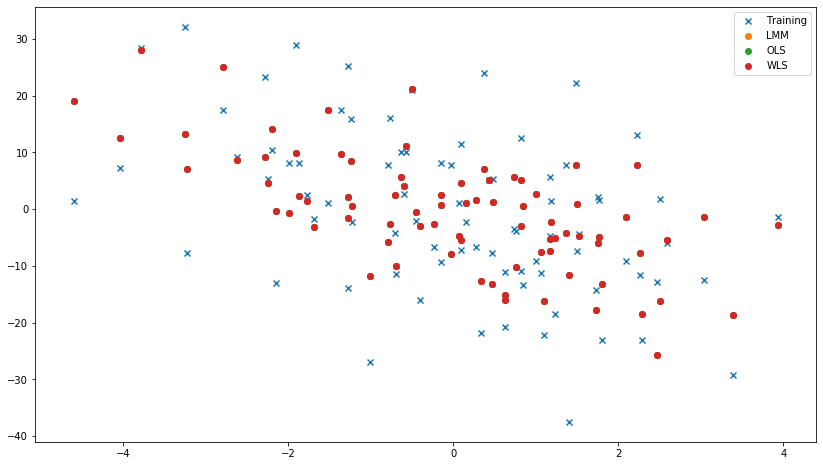

In [96]:
# plt.scatter(X[:,1], y, color = 'red')
plt.figure(figsize= [14,8])
plt.scatter(X_tr[:,2], y_tr, label = "Training", marker='x')
plt.scatter(X_tr[:,2], y_tr_hat_LMM, label = "LMM")
plt.scatter(X_tr[:,2], y_tr_hat_ols, label = "OLS")
plt.scatter(X_tr[:,2], y_tr_hat_wls, label = "WLS")
plt.legend()

In [ ]:
def regression(h2, n, p):
    #h2 heritability
    p_minus_1 = p-1
    np.random.seed(1)
    X = np.random.normal( 0,2, [n, p_minus_1])
    # X = np.random.choice([0,1,2], [n, p_minus_1])
    X = np.concatenate([np.ones([n,1]), X], axis = 1)
    beta = np.random.normal(0, 5, p_minus_1 + 1)
    sigma_g2 = np.var(X @ beta , ddof=1)
    sigma_e2 = sigma_g2 * (1 - h2)/ h2

    epsilon = np.random.normal(0, np.sqrt(sigma_e2), n)
    y = X @ beta + epsilon

    print('sigma_g2 is {}, sigma_e2 is {}, h^2 is {}'.format( sigma_g2,sigma_e2, h2))
    X_tr, X_te, y_tr, y_te = train_test_split(X, y.reshape([-1,1]), test_size = 0.2, random_state = 123)

    n,p = X_tr.shape
    V = sigma_g2 / p * X_tr @ X_tr.T + sigma_e2 * np.diag(np.ones(X_tr.shape[0]))
    inverse_part = getInv(X_tr.T @ getInv(V) @ X_tr)
    K = X_tr @ X_tr.T /p
    add1 = X_tr @ inverse_part @ X_tr.T @ getInv(V)
    add2 = sigma_g2 * K @ getInv(V) @ (np.identity(n) - add1 )
    H = add1 + add2

    beta_hat_ols = getInv(X_tr.T @ X_tr) @ X_tr.T @y_tr
    beta_hat_wls = inverse_part @ X_tr.T @ getInv(V) @ y_tr

    n_tr = X_tr.shape[0]
    y_tr_hat_LMM = H @ y_tr
    y_tr_hat_ols = X_tr @ beta_hat_ols
    y_tr_hat_wls = X_tr @ beta_hat_wls
    tr_error_LMM = 1/n_tr * (np.sum((y_tr - y_tr_hat_LMM)**2))
    tr_error_ols = 1/n_tr * (np.sum((y_tr - y_tr_hat_ols)**2))
    tr_error_wls = 1/n_tr * (np.sum((y_tr - y_tr_hat_wls)**2))
    n_te = len(y_te)
    # print('training error is {}, ols error is {}, wls error is {}, sigma_e2 is {}'.format(tr_error_LMM, tr_error_ols, tr_error_wls, sigma_e2))
    # print('The ratio is {} : {} : {}'.format(1, tr_error_ols/tr_error, tr_error_wls/tr_error))

    y_te_hat_ols = X_te @ beta_hat_ols
    y_te_hat_wls = X_te @ beta_hat_wls

    COV_tr_te = sigma_g2 * X_te @ X_tr.T
    V_inv = np.linalg.inv(V)
    y_te_hat_LMM = y_te_hat_wls + \
        COV_tr_te @ V_inv @ (np.identity(n_tr) - X_tr @ getInv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) @ y_tr

    n_te, p = X_te.shape

    te_error_LMM = 1/n_te * (np.sum((y_te - y_te_hat_LMM)**2))
    te_error_ols = 1/n_te * (np.sum((y_te - y_te_hat_ols)**2))
    te_error_wls = 1/n_te * (np.sum((y_te - y_te_hat_wls)**2))

    # print('test error of LMM is {:.2f}, ols error is {:.2f}, wls error is {:.2f}, sigma_e2 is {:.2f}'.format(te_error_LMM, te_error_ols, te_error_wls, sigma_e2))
    # print('The ratio is {:.2f} : {:.2f} : {:.2f}'.format(1, te_error_ols/te_error_LMM, te_error_wls/te_error_LMM))
    return tr_error_LMM, tr_error_ols, tr_error_wls, te_error_LMM, te_error_ols, te_error_wls, sigma_e2

In [84]:
p_list = [1,2,5, 10,  20,30, 40, 50, 60, 70, 80, 90, 100, 110 , 120]
tr_LMM_list, tr_ols_list, tr_wls_list, te_LMM_list, te_ols_list, te_wls_list = [],[],[],[],[],[]
tr_ratio_ols_LMM, tr_ratio_wls_LMM, te_ratio_ols_LMM, te_ratio_wls_LMM = [],[],[],[]
sigma_e2_list = []
for p in p_list:
    ret = regression(0.5, 100, p)
    tr_LMM_list.append(ret[0])
    tr_ols_list.append(ret[1])
    tr_wls_list.append(ret[2])
    te_LMM_list.append(ret[3])
    te_ols_list.append(ret[4])
    te_wls_list.append(ret[5])
    sigma_e2_list.append(ret[6])

    tr_ratio_ols_LMM.append(ret[1]/ret[0])
    tr_ratio_wls_LMM.append(ret[2]/ret[0])
    te_ratio_ols_LMM.append(ret[4]/ret[3])
    te_ratio_wls_LMM.append(ret[5]/ret[3])
    

sigma_g2 is 3.187316788771765e-30, sigma_e2 is 3.187316788771765e-30, h^2 is 0.5
sigma_g2 is 118.66638012921187, sigma_e2 is 118.66638012921187, h^2 is 0.5
sigma_g2 is 164.79010286685548, sigma_e2 is 164.79010286685548, h^2 is 0.5
sigma_g2 is 1144.9133953887037, sigma_e2 is 1144.9133953887037, h^2 is 0.5
sigma_g2 is 1392.1151635754272, sigma_e2 is 1392.1151635754272, h^2 is 0.5
sigma_g2 is 1740.9380182551324, sigma_e2 is 1740.9380182551324, h^2 is 0.5
sigma_g2 is 5106.330095761481, sigma_e2 is 5106.330095761481, h^2 is 0.5
sigma_g2 is 7502.644555758893, sigma_e2 is 7502.644555758893, h^2 is 0.5
sigma_g2 is 9128.841934969974, sigma_e2 is 9128.841934969974, h^2 is 0.5
sigma_g2 is 6647.24023941449, sigma_e2 is 6647.24023941449, h^2 is 0.5
sigma_g2 is 8313.988744518523, sigma_e2 is 8313.988744518523, h^2 is 0.5
sigma_g2 is 8721.114175325663, sigma_e2 is 8721.114175325663, h^2 is 0.5
sigma_g2 is 10248.27241003183, sigma_e2 is 10248.27241003183, h^2 is 0.5
sigma_g2 is 10580.219229939303, sig

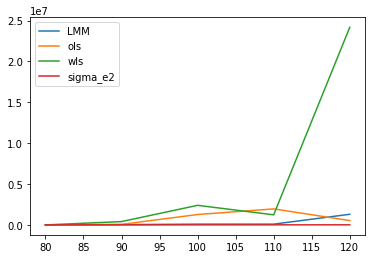

In [87]:
plt.plot(p_list[-5:], tr_LMM_list[-5:], label = "LMM")
plt.plot(p_list[-5:], tr_ols_list[-5:], label = "ols")
plt.plot(p_list[-5:], tr_wls_list[-5:], label = "wls")
plt.plot(p_list[-5:], sigma_e2_list[-5:], label = "sigma_e2")
plt.legend()